# Module 2 Image Classification

In [0]:
from fastai.vision import *

## Loading Data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. 

In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_5.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_76.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_95.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_103.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_152.jpg')]

In [0]:
pat = r'/([^/]+)_\d+.jpg$'?

In [3]:
# import re
# string = 'data/oxford-iiit-pet/images/american_bulldog_146.jpg'
# pat = r'([^/]+)_\d+.jpg$'
# pat = re.compile(pat)
# print(pat.search(string))
# print(pat.search(string).group(1))

<_sre.SRE_Match object; span=(28, 52), match='american_bulldog_146.jpg'>
american_bulldog


In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=100).normalize(imagenet_stats)

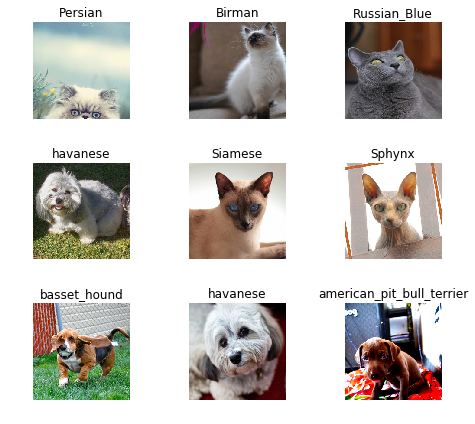

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. 

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
# learn.model

In [0]:
learn.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.718343,0.654492,0.849120,01:53


In [0]:
doc(fit_one_cycle)

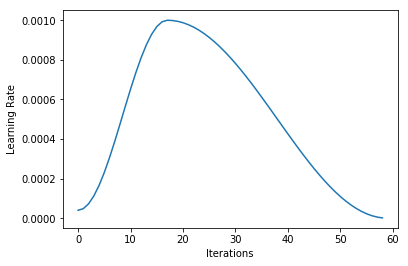

In [0]:
learn.recorder.plot_lr()

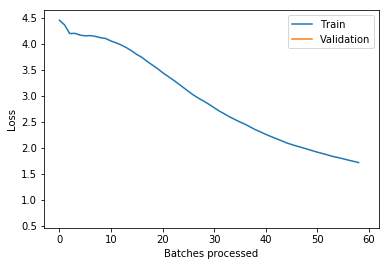

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

## Hyper Parameter Tuning

In [0]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


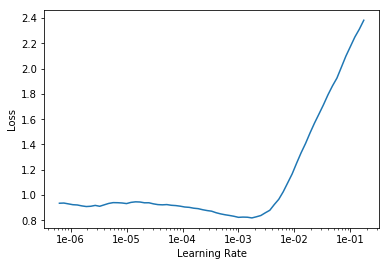

In [0]:
learn.recorder.plot()

## Fine Tune Transfer Learning

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.844695,0.540358,0.880920,01:55


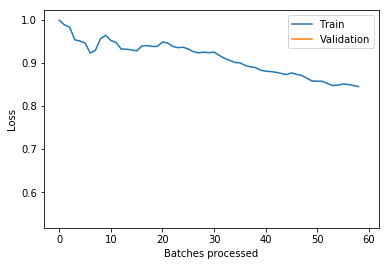

In [0]:
learn.recorder.plot_losses()

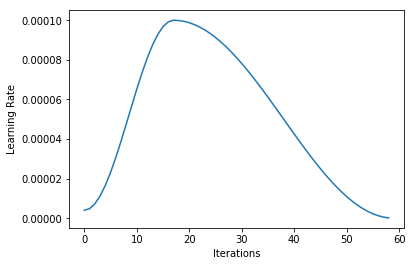

In [0]:
learn.recorder.plot_lr()